In [1]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

lang = 'english'

In [2]:
ign = pd.read_csv("../../../Data/Final Dataset /IGN/IGN_Final.csv")

print(ign.head())

           Author      Timestamp  \
0      shaftedman      1 day ago   
1  gamingdevil800   3 July, 2021   
2  Snagglepuss000   1 June, 2021   
3           seebs  22 July, 2021   
4        LedZepp9   1 June, 2021   

                                             Comment  \
0  IGN Plus... just out of curiosity, does anyone...   
1  This would be a lot more simplistic if you jus...   
2  Back 4 Blood is NOT releasing in June. Pushed ...   
3  MS Flight Simulator, The Ascent, Hades, 12 Min...   
4  All the comments on "there isn't any games, no...   

                                             Article  \
0  daily-deals-the-last-of-us-part-i-spider-man-m...   
1  video-game-release-dates-ps4-ps5-xbox-one-seri...   
2  video-game-release-dates-ps4-ps5-xbox-one-seri...   
3  video-game-release-dates-ps4-ps5-xbox-one-seri...   
4  video-game-release-dates-ps4-ps5-xbox-one-seri...   

                    Game Title  
0            GameSwitch Sports  
1  GameFinal Fantasy 7 Rebirth  
2  GameFin

In [3]:
print(ign.shape)
print(ign.columns)

(41795, 5)
Index(['Author', 'Timestamp', 'Comment', 'Article', 'Game Title'], dtype='object')


In [4]:
ign_comments = ign['Comment']
ign_comments = ign_comments.str.lower()
ign_comments = ign_comments.str.cat(sep=' ')

print(ign_comments[:100])

ign plus... just out of curiosity, does anyone actually have it? and if so, what value have you gott


In [5]:
regex = re.compile('[%s]' % re.escape(string.punctuation))
ign_comments = regex.sub('', ign_comments)

print(ign_comments[:100])

ign plus just out of curiosity does anyone actually have it and if so what value have you gotten fro


In [6]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]{2,}')

In [7]:
tokenized_ign_comments = tokenizer.tokenize(ign_comments)

print(tokenized_ign_comments[:100])
print(len(tokenized_ign_comments))

['ign', 'plus', 'just', 'out', 'of', 'curiosity', 'does', 'anyone', 'actually', 'have', 'it', 'and', 'if', 'so', 'what', 'value', 'have', 'you', 'gotten', 'from', 'it', 'thanks', 'this', 'would', 'be', 'lot', 'more', 'simplistic', 'if', 'you', 'just', 'listed', 'the', 'games', 'with', 'the', 'platforms', 'in', 'bold', 'beside', 'it', 'instead', 'of', 'four', 'different', 'lists', 'often', 'with', 'the', 'same', 'games', 'or', 'just', 'list', 'multiplatform', 'then', 'exclusives', 'back', 'blood', 'is', 'not', 'releasing', 'in', 'june', 'pushed', 'to', 'october', 'months', 'ago', 'ms', 'flight', 'simulator', 'the', 'ascent', 'hades', 'minutes', 'psychonauts', 'forza', 'horizon', 'age', 'of', 'empires', 'iv', 'sable', 'oddly', 'not', 'on', 'this', 'list', 'and', 'halo', 'infinite', 'those', 'are', 'all', 'games', 'coming', 'to', 'game', 'pass']
1073605


In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
lemmatized_ign_comments = [lemmatizer.lemmatize(token) for token in tokenized_ign_comments]

print(lemmatized_ign_comments[:100])
print(len(lemmatized_ign_comments))

['ign', 'plus', 'just', 'out', 'of', 'curiosity', 'doe', 'anyone', 'actually', 'have', 'it', 'and', 'if', 'so', 'what', 'value', 'have', 'you', 'gotten', 'from', 'it', 'thanks', 'this', 'would', 'be', 'lot', 'more', 'simplistic', 'if', 'you', 'just', 'listed', 'the', 'game', 'with', 'the', 'platform', 'in', 'bold', 'beside', 'it', 'instead', 'of', 'four', 'different', 'list', 'often', 'with', 'the', 'same', 'game', 'or', 'just', 'list', 'multiplatform', 'then', 'exclusive', 'back', 'blood', 'is', 'not', 'releasing', 'in', 'june', 'pushed', 'to', 'october', 'month', 'ago', 'm', 'flight', 'simulator', 'the', 'ascent', 'hades', 'minute', 'psychonauts', 'forza', 'horizon', 'age', 'of', 'empire', 'iv', 'sable', 'oddly', 'not', 'on', 'this', 'list', 'and', 'halo', 'infinite', 'those', 'are', 'all', 'game', 'coming', 'to', 'game', 'pas']
1073605


In [10]:
stopwords = set(stopwords.words(lang))

In [11]:
cleaned_ign_comments = [token for token in lemmatized_ign_comments if token not in stopwords]

print(cleaned_ign_comments[:100])
print(len(cleaned_ign_comments))

['ign', 'plus', 'curiosity', 'doe', 'anyone', 'actually', 'value', 'gotten', 'thanks', 'would', 'lot', 'simplistic', 'listed', 'game', 'platform', 'bold', 'beside', 'instead', 'four', 'different', 'list', 'often', 'game', 'list', 'multiplatform', 'exclusive', 'back', 'blood', 'releasing', 'june', 'pushed', 'october', 'month', 'ago', 'flight', 'simulator', 'ascent', 'hades', 'minute', 'psychonauts', 'forza', 'horizon', 'age', 'empire', 'iv', 'sable', 'oddly', 'list', 'halo', 'infinite', 'game', 'coming', 'game', 'pas', 'day', 'one', 'year', 'otherwise', 'wouldve', 'purchased', 'dont', 'doesnt', 'even', 'incsee', 'comment', 'isnt', 'game', 'point', 'new', 'system', 'make', 'laugh', 'played', 'buddy', 'series', 'last', 'night', 'xsx', 'wa', 'shocked', 'performance', 'fps', 'console', 'wa', 'mind', 'blowing', 'think', 'many', 'gamers', 'would', 'shocked', 'useful', 'series', 'see', 'every', 'year', 'go', 'find', 'gaming', 'pc']
612015


In [12]:
freq_dist = FreqDist(cleaned_ign_comments)

In [13]:
freq_dist.most_common(15)

[('game', 21173),
 ('see', 8514),
 ('wa', 8103),
 ('like', 7131),
 ('one', 4688),
 ('get', 4143),
 ('would', 3500),
 ('year', 3457),
 ('time', 3429),
 ('play', 3260),
 ('good', 3231),
 ('really', 3051),
 ('im', 3006),
 ('p', 2928),
 ('ha', 2917)]

In [14]:
bigrams = ngrams(cleaned_ign_comments, 2)

print(list(bigrams)[:10])

[('ign', 'plus'), ('plus', 'curiosity'), ('curiosity', 'doe'), ('doe', 'anyone'), ('anyone', 'actually'), ('actually', 'value'), ('value', 'gotten'), ('gotten', 'thanks'), ('thanks', 'would'), ('would', 'lot')]


In [15]:
bigrams_list = ngrams(cleaned_ign_comments, 2)
bigram_count = Counter(bigrams_list)

In [16]:
print(bigram_count.most_common(15))

[(('game', 'wa'), 618), (('feel', 'like'), 602), (('look', 'like'), 589), (('video', 'game'), 484), (('game', 'pas'), 446), (('game', 'like'), 407), (('looking', 'forward'), 390), (('cant', 'wait'), 388), (('play', 'game'), 376), (('first', 'game'), 356), (('great', 'game'), 342), (('sound', 'like'), 327), (('alan', 'wake'), 315), (('final', 'fantasy'), 305), (('game', 'year'), 303)]


In [17]:
bigrams, counts = zip(*bigram_count.most_common(20))

In [18]:
bigram_labels = [' '.join(bigram) for bigram in bigrams]

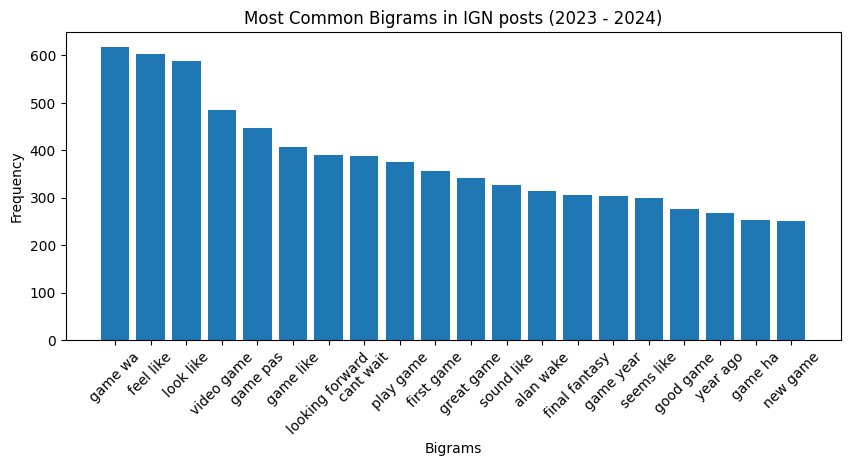

In [19]:
plt.figure(figsize=(10, 4))
plt.bar(bigram_labels, counts)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Most Common Bigrams in IGN posts (2023 - 2024)')
plt.xticks(rotation=45)
plt.show()